In [1]:
import os
import time
import pandas as pd
import numpy as np
import scipy as sc
import scipy.misc
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont

In [2]:
# List of characters and classes
characterList = np.array('A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'.split(' '))
numbersList = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype = int)
func = np.vectorize(str)
classesText = np.concatenate([func(numbersList), characterList, np.array(['background'])])

In [3]:
# function for selecting random character
def selectorOFCharacters (listOfCharactor):
    character = np.random.choice(listOfCharactor)
    if type(character) == np.str_:
        return str(character)
    else:
        return int(character)

In [4]:
# Generating fake number Plates characters for images
def plateGenerator (numberOfPlates):
    platesList = []
    for i in range(numberOfPlates):
        plateList = []
        for j in range(8):
            if j == 2:
                plateList.append(selectorOFCharacters(characterList))
            else:
                plateList.append(selectorOFCharacters(numbersList))
        platesList.append(plateList)
    platesList = np.array(platesList)
    return platesList

In [5]:
# function for setup repetitive setup images
def setupPNGCharacter (coordinates, character, width = 90, height = 75, font = "arial.ttf", fontSize = 95,
                      destination = 'E:/Hamed/Projects/Python/License Plate Detection/License-Plate-Detection/Characterslist/{}.png'):
    font = ImageFont.truetype(font, fontSize)
    img = Image.new('RGB', (width, height), color = (255, 255, 255))
    draw = ImageDraw.Draw(img)
    if type(coordinates) != tuple:
        raise TypeError('Coordinates must be tuple')
    draw = draw.text(coordinates, character, fill = (0, 0, 0), font = font)
    img.save(destination.format(character))

In [6]:
# Create PNG files of characters
def createPNGPieces (charactersList):
    if isinstance(charactersList[0], str):
        for character in charactersList:
            if character == 'C':
                setupPNGCharacter(coordinates = (10, -16), character = character)
            elif character == 'G':
                setupPNGCharacter(coordinates = (8, -15), character = character)
            elif character == 'I':
                setupPNGCharacter(coordinates = (32, -15), character = character)
            elif character == 'J':
                setupPNGCharacter(coordinates = (23, -15), character = character)
            elif character == 'L':
                setupPNGCharacter(coordinates = (18, -15), character = character)
            elif character == 'M':
                setupPNGCharacter(coordinates = (6, -15), character = character)
            elif character == 'O':
                setupPNGCharacter(coordinates = (8, -15), character = character)
            elif character == 'Q':
                setupPNGCharacter(coordinates = (7, -16), character = character)
            elif character == 'W':
                setupPNGCharacter(coordinates = (0, -16), character = character)
            else:
                setupPNGCharacter(coordinates = (14, -14), character = character)
    else:
        for character in charactersList:
            character = str(character)
            setupPNGCharacter(coordinates = (-1, -15), character = character, width = 50, height = 75)
            setupPNGCharacter(coordinates = (-1, -15), character = character, width = 45, height = 65, fontSize = 85,
            destination = 'E:/Hamed/Projects/Python/License Plate Detection/License-Plate-Detection/Characterslist/smaller{}.png')

In [7]:
createPNGPieces(characterList)
createPNGPieces(numbersList)

In [8]:
# Preparing characters of number Plates for png files
def joiningPartsOfPlate (plate):
    return list(map(lambda number:''.join(number), plate))

In [9]:
# for prepare background and foreground image
def imageManager (character, width, height, backgroundImage = 'Plate Pieces/background.png',
                  foregroundImage = 'Characterslist/{}.png'):
    background = Image.open(backgroundImage)
    foreground = Image.open(foregroundImage.format(character))
    background.paste(foreground, (width, height))
    background.save(backgroundImage)

In [106]:
# creating real number Plates
def createNumberPlates (plates):
    for plateNumber in range(len(plates)):
        image = Image.open('background.png')
        background = image.copy()
        background.save('Plate Pieces/background.png')
        width = 74
        for i in range(6):
            if i < 2:
                imageManager (plates[plateNumber, i], width, 26)
                width += 57
            elif i == 2:
                imageManager (plates[plateNumber, i], width, 26)
                width += 95
            else:
                imageManager (plates[plateNumber, i], width, 26)
                width += 57
        width = 474
        for i in range(2):
            imageManager (plates[plateNumber, i], width, 42)
            width += 57
        background = Image.open('Plate Pieces/background.png')
        name = joiningPartsOfPlate([plates[plateNumber]])[0]
        background.save('Plate Pieces/{}.png'.format(name))
    os.remove(path = 'Plate Pieces/background.png')

In [52]:
# for finding character and it's coordinates
def searchAndAppendCharacter(character, listOfChracters, xmin, xmax, ymin = 26, ymax = 101):
    classOfChracter = np.where(classesText == character)[0][0]
    xmin = xmin
    ymin = ymin
    xmax = xmax
    ymax = ymax
    listOfChracters = listOfChracters.append([classOfChracter, xmin, ymin, xmax, ymax])

In [332]:
# This function gonna make data classes and coordinates
def summary (plates):
    # make a list for all plates
    listOfAllSummeries = []
    for plate in plates:
        # make a list for one plate
        listOfThisPlateSummery = []
        xMin = 74
        for character in range(6):
            # first find the classes and texes
            # second add coordinates
            # third add them together
            if character < 2:
                searchAndAppendCharacter(plate[character], listOfThisPlateSummery, xMin, xMin + 50)
                xMin += 57
            elif character == 2:
                searchAndAppendCharacter(plate[character], listOfThisPlateSummery, 188, xMin + 93)
                xMin += 95
            else:
                searchAndAppendCharacter(plate[character], listOfThisPlateSummery, xMin, xMin + 50)
                xMin += 57
        xMin = 474
        for character in range(2):
            searchAndAppendCharacter(plate[character], listOfThisPlateSummery, xMin, xMin + 45, 42, 107)
            xMin += 57
        searchAndAppendCharacter('background', listOfThisPlateSummery, 0, 600, 0, 130)
        listOfThisPlateSummery = np.array(listOfThisPlateSummery)
        listOfAllSummeries.append(listOfThisPlateSummery)
    return np.array(listOfAllSummeries)

In [333]:
summary (plateGenerator(1))

array([[[  9,  74,  26, 124, 101],
        [  9, 131,  26, 181, 101],
        [ 23, 188,  26, 281, 101],
        [  0, 283,  26, 333, 101],
        [  0, 340,  26, 390, 101],
        [  1, 397,  26, 447, 101],
        [  9, 474,  42, 519, 107],
        [  9, 531,  42, 576, 107],
        [ 36,   0,   0, 600, 130]]], dtype=int64)

In [321]:
# This function draw rectangles on current axis and image
def drawRectangle(coordinates, axis, width = 50, height = 75, linewidth = 1):
    colors = plt.cm.hsv(np.linspace(0, 1, 9)).tolist()
    rectangle = patches.Rectangle(coordinates, width, height, linewidth = linewidth, edgecolor = colors[np.random.choice(9)], facecolor = 'none')
    axis.add_patch(rectangle)

In [327]:
# This function show images and frames
def showImages (plates):
    # make the images and get summary of image
    createNumberPlates(plates)
    summaryOfPlates = summary(plates)
    for plate in plates:
    # first get array of image
        image = np.array(Image.open('Plate Pieces/{}.png'.format(joiningPartsOfPlate([plate])[0])), dtype = np.uint8)
        figure, axis = plt.subplots(1)
        axis.imshow(image)
#       second make rectangles
        iterator = 57
        xmin = 73
        for number in range(6):
            if number < 2:
                drawRectangle((xmin, 25), axis, 50, 75)
                xmin += iterator
            elif number == 2:
                drawRectangle((185, 25), axis, 93, 75)
                xmin += 95
            else:
                drawRectangle((xmin, 25), axis, 50, 75)
                xmin += iterator
        xmin = 474
        for character in range(2):
            drawRectangle((xmin, 41), axis, 48, 73)
            xmin += 56
        drawRectangle((5, 5), axis, 590, 120, 3)
        plt.show()

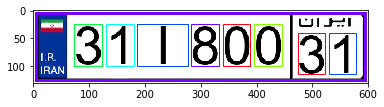

In [329]:
showImages (plateGenerator(1))